In [20]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats

import random
random.seed(42)

In [22]:
base_path = "Shareddrives/GCP hackathon/Data/Final Data"

In [23]:
df = pd.read_csv(f"{base_path}/Clean_data.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413 entries, 0 to 1412
Data columns (total 50 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   ZCTA                                              1413 non-null   int64  
 1   Total Population                                  1413 non-null   int64  
 2   insurance_access                                  1413 non-null   float64
 3   ARTHRITIS_CrudePrev                               1413 non-null   float64
 4   DRINKING                                          1413 non-null   float64
 5   BPHIGH_CrudePrev                                  1413 non-null   float64
 6   CANCER_CrudePrev                                  1413 non-null   float64
 7   CASTHMA_CrudePrev                                 1413 non-null   float64
 8   CHD_CrudePrev                                     1413 non-null   float64
 9   COPD_CrudePrev     

In [24]:
# Replacing empty healthcare facilities with 0
df[['OSM_healthcare_poi','zip_level_facilities', 'county_level_facilities']] = df[['OSM_healthcare_poi','zip_level_facilities', 'county_level_facilities']].fillna(0)

In [25]:
df['All_death %'] = df['All_death']/df['Total Population']
df['Heart_death %'] = df['Heart_death']/df['Total Population']

In [26]:
df.dropna(inplace=True)

In [27]:
df.corr()

,ZCTA,Total Population,insurance_access,ARTHRITIS_CrudePrev,DRINKING,BPHIGH_CrudePrev,CANCER_CrudePrev,CASTHMA_CrudePrev,CHD_CrudePrev,COPD_CrudePrev,HIGHCHOL_CrudePrev,CSMOKING_CrudePrev,DIABETES_CrudePrev,OBESITY_CrudePrev,STROKE_CrudePrev,Total_Population_18plus,Less than high school graduate,High school graduate,Some college or associate's degree,Bachelor's degree or higher,Employed_16_above,All_death,Heart_death,Income,Total Male%,Total Female%,Male: Under 5%,Male: 5 to 17%,Male: 18 to 39%,Male: 40 to 59%,Male: 60 and Over%,Female: Under 5%,Female: 5 to 17%,Female: 18 to 39%,Female: 40 to 59%,Female: 60 and Over%,OSM_healthcare_poi,zip_level_facilities,zip_level_facilities_filtered,county_level_facilities,county_level_facilities_filtered,Population of one race,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some Other Race alone,Two or More Races,All_death %,Heart_death %
ZCTA,1.000000,-0.197217,-0.228063,0.299102,0.144685,0.095054,0.211693,0.487612,0.182708,0.284322,0.120202,0.206026,-0.040603,0.027460,0.125024,-0.187715,-0.132961,0.101721,0.171091,-0.026589,0.026258,-0.074085,-0.203814,0.066671,0.076486,-0.013101,-0.013453,0.001317,-0.081034,-0.029265,0.189778,-0.037943,-0.032451,-0.078611,-0.033119,0.118169,0.063769,-0.215845,-0.060331,-0.771509,-0.818177,-0.226149,0.198752,-0.149905,0.256945,-0.013923,0.169924,-0.239506,0.226149,0.180135,-0.010181
Total Population,-0.197217,1.000000,0.331094,-0.387724,0.020081,-0.261229,-0.418739,-0.089792,-0.309215,-0.240811,-0.306438,0.058859,0.034456,0.059877,-0.213327,0.984765,0.289533,0.151740,-0.069953,-0.230106,-0.126483,0.823848,0.755237,-0.111027,-0.006845,0.000934,0.071724,0.046810,0.071899,-0.029799,-0.102796,0.082191,0.083772,0.055913,0.001125,-0.124756,0.133265,0.197127,0.358797,0.136368,0.162131,-0.143819,-0.380293,0.107974,-0.128042,0.121854,0.167711,0.376641,0.143819,-0.314803,-0.268148
insurance_access,-0.228063,0.331094,1.000000,-0.288579,-0.212962,0.070579,-0.616163,0.351047,0.113947,0.249171,-0.308970,0.690755,0.677265,0.722264,0.276937,0.246056,0.954153,0.547124,-0.213505,-0.742764,-0.388089,0.134378,0.133597,-0.664257,0.049168,-0.032470,0.109784,0.153733,0.099444,-0.055917,-0.111728,0.096822,0.159593,0.045398,-0.100709,-0.132011,-0.096436,0.087798,0.228592,0.170087,0.172452,0.054667,-0.559800,0.207139,0.263084,-0.208422,0.052321,0.955670,-0.054667,-0.274650,-0.210747
ARTHRITIS_CrudePrev,0.299102,-0.387724,-0.288579,1.000000,-0.337109,0.876637,0.859064,0.387213,0.877308,0.778419,0.872837,0.183734,0.367729,0.221334,0.766344,-0.404170,-0.235616,0.186336,0.242270,-0.113591,-0.125611,0.010472,0.036071,-0.135861,0.078210,-0.031492,-0.046133,0.034597,-0.145015,0.014890,0.226174,-0.051509,-0.042987,-0.204999,-0.008941,0.227638,-0.208857,-0.112759,-0.061262,-0.340866,-0.357280,0.222320,0.570369,-0.104051,0.311957,-0.417967,-0.136464,-0.355482,-0.222320,0.830193,0.720938
DRINKING,0.144685,0.020081,-0.212962,-0.337109,1.000000,-0.562606,-0.249535,0.087746,-0.508022,-0.313824,-0.484421,-0.060398,-0.648058,-0.138769,-0.544750,0.054839,-0.241262,-0.109925,0.188576,0.177734,0.188825,-0.087650,-0.134123,0.168330,-0.018940,-0.019556,-0.011846,-0.051984,0.003085,-0.036493,0.024665,-0.009485,-0.038579,0.044676,-0.048410,-0.020568,0.037154,-0.020488,-0.043155,-0.122109,-0.126282,-0.294433,0.335106,-0.100650,-0.034106,-0.302171,0.049546,-0.148316,0.294433,-0.353122,-0.371676
BPHIGH_CrudePrev,0.095054,-0.261229,0.070579,0.876637,-0.562606,1.000000,0.611846,0.411972,0.935203,0.837702,0.789784,0.395213,0.711101,0.448909,0.937228,-0.301077,0.117681,0.371377,0.131287,-0.351645,-0.239607,0.078630,0.127111,-0.381121,0.097083,-0.033112,-0.002632,0.071688,-0.073115,0.006541,0.147620,-0.011473,0.000407,-0.154808,-0.035427,0.155162,-0.225022,-0.074396,0.014742,-0.176014,-0.184767,0.265800,0.185644,0.177234,0.345968,-0.344608,-0.078279,-0.032205,-0.265800,0.760666,0.702095
CANCER_CrudePrev,0.211693,-

In [28]:
df.columns

Index(['ZCTA', 'Total Population', 'insurance_access', 'ARTHRITIS_CrudePrev',
       'DRINKING', 'BPHIGH_CrudePrev', 'CANCER_CrudePrev', 'CASTHMA_CrudePrev',
       'CHD_CrudePrev', 'COPD_CrudePrev', 'HIGHCHOL_CrudePrev',
       'CSMOKING_CrudePrev', 'DIABETES_CrudePrev', 'OBESITY_CrudePrev',
       'STROKE_CrudePrev', 'Total_Population_18plus',
       'Less than high school graduate', 'High school graduate',
       'Some college or associate's degree', 'Bachelor's degree or higher',
       'Employed_16_above', 'All_death', 'Heart_death', 'Income',
       'Total Male%', 'Total Female%', 'Male: Under 5%', 'Male: 5 to 17%',
       'Male: 18 to 39%', 'Male: 40 to 59%', 'Male: 60 and Over%',
       'Female: Under 5%', 'Female: 5 to 17%', 'Female: 18 to 39%',
       'Female: 40 to 59%', 'Female: 60 and Over%', 'OSM_healthcare_poi',
       'zip_level_facilities', 'zip_level_facilities_filtered',
       'county_level_facilities', 'county_level_facilities_filtered',
       'county_name', 'Popu

In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

X = df.drop(columns=['All_death', 'Heart_death','All_death %','Heart_death %',
                     'county_name', 'ARTHRITIS_CrudePrev', 'DRINKING',
                     'BPHIGH_CrudePrev', 'CANCER_CrudePrev', 'CASTHMA_CrudePrev',
                      'COPD_CrudePrev', 'HIGHCHOL_CrudePrev',
                     'CSMOKING_CrudePrev', 'DIABETES_CrudePrev', 'OBESITY_CrudePrev',
                     'STROKE_CrudePrev', 'Total_Population_18plus', 'ZCTA'])
y = df['All_death %']

regressor = DecisionTreeRegressor(max_depth=7, min_samples_split=5, min_samples_leaf=5,)
regressor.fit(X,y)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=5, min_samples_split=5)

In [30]:
regressor.score(X, y)

0.8456161912783589

In [31]:
text_representation = tree.export_text(regressor)
print(text_representation)

|--- feature_2 <= 0.07
|   |--- feature_2 <= 0.05
|   |   |--- feature_2 <= 0.04
|   |   |   |--- feature_2 <= 0.03
|   |   |   |   |--- feature_2 <= 0.02
|   |   |   |   |   |--- value: [0.00]
|   |   |   |   |--- feature_2 >  0.02
|   |   |   |   |   |--- feature_18 <= 0.18
|   |   |   |   |   |   |--- feature_0 <= 30348.50
|   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |   |--- feature_0 >  30348.50
|   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |--- feature_18 >  0.18
|   |   |   |   |   |   |--- feature_0 <= 23918.00
|   |   |   |   |   |   |   |--- value: [0.01]
|   |   |   |   |   |   |--- feature_0 >  23918.00
|   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |--- feature_2 >  0.03
|   |   |   |   |--- feature_6 <= 0.46
|   |   |   |   |   |--- feature_8 <= 64766.00
|   |   |   |   |   |   |--- feature_31 <= 0.00
|   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |   |--- feature_31 >  0.00
|   |   |   |   |   |  

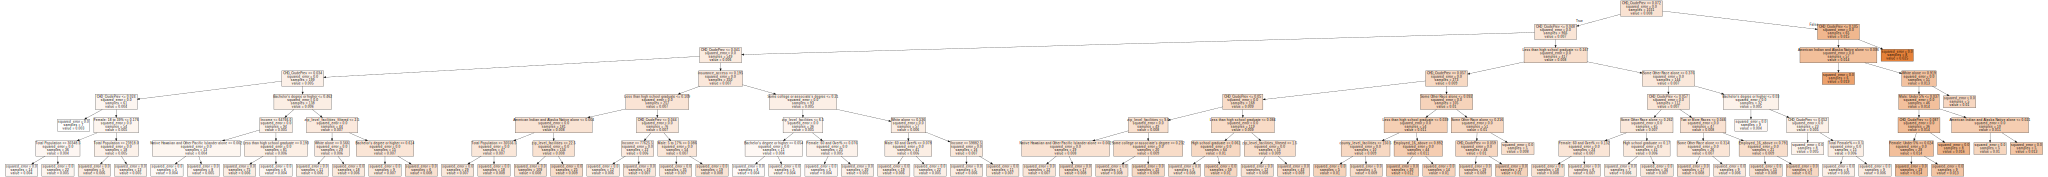

In [48]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(regressor, out_file=None, 
                                feature_names=X.columns,
                                filled=True)

# Draw graph
mygraph = graphviz.Source(dot_data) 
mygraph

In [49]:
mygraph.render("temp_file",format="png", view=False)

OSError: ignored